In [1]:
using Pkg; Pkg.activate("../")

 Activating environment at `~/project_TE/package_CMI_prague/Project.toml`


In [2]:
Pkg.status()

Status `~/project_TE/package_CMI_prague/Project.toml`
  [5732040d] DelayEmbeddings v1.20.0
  [634d3b9d] DrWatson v1.16.6
  [ed8fcbec] Entropies v0.11.0 `https://github.com/JuliaDynamics/Entropies.jl#master`
  [d330b81b] PyPlot v2.9.0
  [fd094767] Suppressor v0.2.0
  [79125185] package_CMI_prague v0.1.0 `src/package_CMI_prague`


In [29]:
include("../src/read_bin.jl")
include("../src/basicent.jl")

tranfserentropy (generic function with 7 methods)

In [4]:
using Plots
using Suppressor

In [6]:
n_points = 131072
couplings = LinRange(0, 0.25, 99)
root = "../data/exp_raw/binfiles/Rossler_bin_"
#root = "/Users/andreu/Desktop/Dropbox/transfer_inormation_prague/code/binfiles/Rossler_bin_"
test_couplings = read_bin_couplings(root, n_points, couplings);

1 0.0
2 0.002551020408163265
3 0.00510204081632653
4 0.007653061224489796
5 0.01020408163265306
6 0.012755102040816325
7 0.015306122448979591
8 0.017857142857142856
9 0.02040816326530612
10 0.02295918367346939
11 0.02551020408163265
12 0.02806122448979592
13 0.030612244897959183
14 0.033163265306122444
15 0.03571428571428571
16 0.03826530612244898
17 0.04081632653061224
18 0.04336734693877551
19 0.04591836734693878
20 0.04846938775510204
21 0.0510204081632653
22 0.053571428571428575
23 0.05612244897959184
24 0.0586734693877551
25 0.061224489795918366
26 0.06377551020408162
27 0.06632653061224489
28 0.06887755102040817
29 0.07142857142857142
30 0.07397959183673469
31 0.07653061224489796
32 0.07908163265306122
33 0.08163265306122448
34 0.08418367346938775
35 0.08673469387755102
36 0.08928571428571429
37 0.09183673469387756
38 0.09438775510204081
39 0.09693877551020408
40 0.09948979591836735
41 0.1020408163265306
42 0.10459183673469387
43 0.10714285714285715
44 0.1096938775510204
45 0.112

In [7]:
using DrWatson

In [8]:
import Distributions: Uniform, Normal

In [116]:
pts = Dataset([rand(Uniform(0, 1), 1) for i = 1:10])

1-dimensional Dataset{Float64} with 10 points
 0.406095872378224
 0.6381957426484504
 0.7214012987619842
 0.784546719806156
 0.14875016822097353
 0.5010886841667204
 0.9423728049688602
 0.17170680238654956
 0.028667168292657363
 0.20516928470331264

In [25]:
a = test_couplings[:,:,33]
x = a[:,2]/maximum(abs.(a[:,2]))
Bin = 3
estKnn = Kraskov(w = 3, k = Bin)
estVf  = VisitationFrequency(Entropies.RectangularBinning(Bin))
E1 = Entropies.genentropy(Dataset(x), estKnn)
E2 = Entropies.genentropy(Dataset(x), estVf)
println(E1)
println(E2)

1.3056091842771398
1.0909453959501931


In [26]:
function TE_for_couplings(test_couplings, τs, js, est, root2, name)
    TE = Array{Float64}(undef,  length(couplings), 1)
    @suppress_err begin
    open("$root2/$name", "w") do f
        for i in 1:size(test_couplings, 3)-1
            if i%10 == 3
                a = test_couplings[:,:,i]
                x = a[:,1]/maximum(abs.(a[:,1]))
                y = a[:,2]/maximum(abs.(a[:,2]))
                joint = DelayEmbeddings.genembed(Dataset(x, y),  τs, js )
                #e = tranfserentropy(joint, est; embdim = 5, α =1.0, base =2)
                e = tranfserentropy(joint, est,  2)
                println(i, " , ", couplings[i], ' ', e)
                aux = couplings[i]
                TE[i] = e
                write(f, "$aux $e\n")
            end
        end
    end
    end

    plot(couplings, TE)
    xlabel!("Coupling ϵ")
    ylabel!("TE")
end 

TE_for_couplings (generic function with 1 method)

couplings_TE-Kra-3-lag_25.txt
3 , 0.00510204081632653 -0.019270311913359706
13 , 0.030612244897959183 0.17955724475376655
23 , 0.05612244897959184 0.35361056836296534
33 , 0.08163265306122448 0.3325566081008926
43 , 0.10714285714285714 0.6543578793840972
53 , 0.1326530612244898 0.82345940281607
63 , 0.15816326530612246 1.5503828869315157
73 , 0.1836734693877551 2.0335362893683158
83 , 0.20918367346938777 2.033465315159061
93 , 0.23469387755102042 1.9878285698500786
3 , 0.00510204081632653 -0.10800979708688807
13 , 0.030612244897959183 -0.09423182202691471
23 , 0.05612244897959184 -0.05173111708997524
33 , 0.08163265306122448 0.02318936868652699
43 , 0.10714285714285714 0.3782900809478047
53 , 0.1326530612244898 0.9744554780623531
63 , 0.15816326530612246 1.5143821438845002
73 , 0.1836734693877551 2.011586355898981
83 , 0.20918367346938777 2.001827583612295
93 , 0.23469387755102042 1.947731917540045


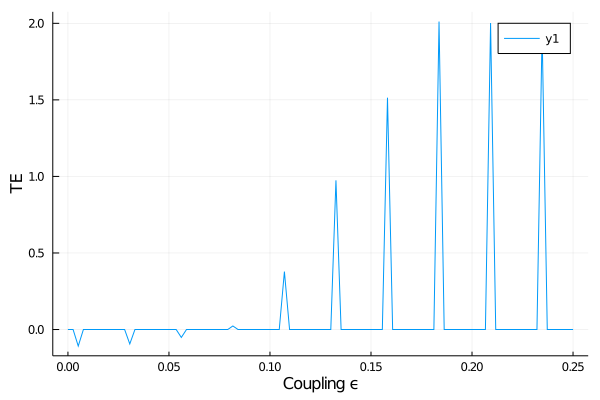

In [30]:
Bin = 3
b = Entropies.RectangularBinning(Bin)
root2 = "../data/exp_pro/correlations_TE"
lag = 25
#τs = (0,  -10, -5, 0, lag)
τs = (0,  0, lag)
#js = (2, 1, 1, 1, 1)
#js = (1, 2, 2, 2, 2)
js = (1, 2, 2)
#js = (2, 1, 1)
aux = '_'
for (i, e) in enumerate(τs)
    aux = string(τs[i],aux,js[i])
end
#est = VisitationFrequency(b)
#est = KozachenkoLeonenko(RecBin,0)
#KozachenkoLeonenko(w = 0)
est = Kraskov(w = Bin, k = Bin)
#name = "couplings_TE_cbv$RecBin-$aux.txt"
strEst = string(est)[1:3]
prefix = "couplings_TE"
suffix = "txt"
name = "$prefix-$strEst-$Bin-lag_$lag.$suffix"
println(name )
d = (est = strEst,  Bin = Bin, lag = lag)
name = savename(prefix, d , suffix)
js = (1, 2, 2)
TE_for_couplings(test_couplings, τs, js, est, root2, name)
js = (2, 1, 1)
TE_for_couplings(test_couplings, τs, js, est, root2, name)

In [96]:
?Kraskov

search: Kraskov



## k-th nearest neighbour(kNN) based

```
Kraskov(k::Int = 1, w::Int = 1) <: NearestNeighborEntropyEstimator
```

Entropy estimator based on `k`-th nearest neighbor searches[^Kraskov2004]. `w` is the number of nearest neighbors to exclude when searching for neighbours  (defaults to `0`, meaning that only the point itself is excluded).

!!! info
    This estimator is only available for entropy estimation. Probabilities cannot be obtained directly.


[^Kraskov2004]: Kraskov, A., Stögbauer, H., & Grassberger, P. (2004). Estimating mutual information. Physical review E, 69(6), 066138.


In [24]:
?KozachenkoLeonenko

search: KozachenkoLeonenko



```
KozachenkoLeonenko(; w::Int = 0) <: NearestNeighborEntropyEstimator
```

Entropy estimator based on nearest neighbors. This implementation is based on Kozachenko & Leonenko (1987)[^KozachenkoLeonenko1987], as described in Charzyńska and Gambin (2016)[^Charzyńska2016].

`w` is the Theiler window (defaults to `0`, meaning that only the point itself is excluded when searching for neighbours).

!!! info
    This estimator is only available for entropy estimation. Probabilities cannot be obtained directly.


[^Charzyńska2016]: Charzyńska, A., & Gambin, A. (2016). Improvement of the k-NN entropy estimator with applications in systems biology. Entropy, 18(1), 13.

[^KozachenkoLeonenko1987]: Kozachenko, L. F., & Leonenko, N. N. (1987). Sample estimate of the entropy of a random vector. Problemy Peredachi Informatsii, 23(2), 9-16.


In [73]:
"""this is a stupid function that given a vector A, copies it 
to a vector B but changes  one unique value of that vector 
in the position I, leaving all ther rest the same"""

function changevector!(A, τ, I)
    B = Vector{Int64}(undef, length(A))#zeros(length(A))
     # LinRange(0, 0, length(A))#A#Array{Tuple{Int64,Int64}}(undef, length(couplings))
    @inbounds for i in eachindex(A)
        if i == I
            #append!( B, τ )
            B[i] = τ
        else
            #append!( B, A[i] )
            B[i] = A[i]
        end
    end
    return B
end

changevector! (generic function with 1 method)

In [74]:
#root2 = "/Users/andreu/Desktop/Dropbox/transfer_inormation_prague/code/correlations_TE"
root2 = "../data/exp_pro/correlations_TE"
maxτ = 50
jumpτ = 5
aux = LinRange(jumpτ, maxτ, 10)
τ_range = round.(Int64, aux)
println(τ_range)
#τs = (0,  10, 5, 0, maxτ)
#js = (2, 1, 1, 1, 1)
#js = (1, 2, 2, 2, 2)

τs = (0, 0,  maxτ ) #RIGhT ORDER FOR THE 3 dimensional embbeding case
#js = (2, 1, 1)
js = (1, 2, 2)

aux = '_'
for (i, e) in enumerate(τs)
    aux = string(τs[length(τs)-i+1],aux,js[i])
end
name = "couplings_meanTE_Knn$RecBin-$aux.txt"

open("$root2/$name", "w") do f
    @suppress_err begin
        for i in 1:size(test_couplings, 3)-1
            mean_TE = 0
            a = test_couplings[:,:,i]
            x = a[:,1]
            y = a[:,2]
            for t in τ_range
                print(t)
                ts =  changevector!(τs, t, 2)
                joint = DelayEmbeddings.genembed(Dataset(x, y),  ts, js )
                #e = tranfserentropy(joint, VisitationFrequency(b), α = 1.0, base = 2)
                #e = tranfserentropy(joint, VisitationFrequency(b); embdim = 5, α =1.0, base =2)
                e = tranfserentropy(joint, KozachenkoLeonenko(1,8),  2)
                mean_TE += e/length(τ_range)  
            end
            aux = couplings[i]
            println(couplings[i], ' ', mean_TE)
            write(f, "$aux $mean_TE\n")
        end
    end
end

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
5  uh 

LoadError: BoundsError: attempt to access (-13.45701, 2.652757, -3.878211)
  at index [5]

In [169]:
aux = LinRange(jumpτ, maxτ, 10)
τ_range = round.(Int64, aux)

10-element Array{Int64,1}:
  3
  6
  9
 12
 15
 18
 21
 24
 27
 30

In [137]:
τ_range = LinRange(1, 10, 10)
EE = Array{Float64}(undef,  length(τ_range), 1)
for t in τ_range
    EE[1] += t/length(τ_range) #+ EE[1] 
end
EE[1]

5.5

In [123]:
B = zeros(0)#LinRange(0, 0, length(τs))
append!( B, 3 )

1-element Array{Float64,1}:
 3.0

In [126]:
ts =  changevector!(τs, 33, 2)
ts

5-element Array{Int64,1}:
   0
  33
   0
  -5
 -10

In [55]:
?DelayEmbeddings.genembed

```
genembed(s, τs, js = ones(...); ws = nothing) → dataset
```

Create a generalized embedding of `s` which can be a timeseries or arbitrary `Dataset`, and return the result as a new `Dataset`.

The generalized embedding works as follows:

  * `τs` denotes what delay times will be used for each of the entries of the delay vector. It is recommended that `τs[1] = 0`. `τs` is allowed to have *negative entries* as well.
  * `js` denotes which of the timeseries contained in `s` will be used for the entries of the delay vector. `js` can contain duplicate indices.
  * `ws` are optional weights that weight each embedded entry (the i-th entry of the    delay vector is weighted by `ws[i]`). If provided, it is recommended that `ws[1] = 1`

`τs, js, ws` are tuples (or vectors) of length `D`, which also coincides with the embedding dimension. For example, imagine input trajectory $s = [x, y, z]$ where $x, y, z$ are timeseries (the columns of the `Dataset`). If `js = (1, 3, 2)` and `τs = (0, 2, -7)` the created delay vector at each step $n$ will be

$$
(x(n), z(n+2), y(n-7))
$$

Using `ws = (1, 0.5, 0.25)` as well would create

$$
(x(n), \frac{1}{2} z(n+2), \frac{1}{4} y(n-7))
$$

`js` can be skipped, defaulting to index 1 (first timeseries) for all delay entries, while it has no effect if `s` is a timeseries instead of a `Dataset`.

See also [`embed`](@ref). Internally uses [`GeneralizedEmbedding`](@ref).


test_couplings[1,2,1]

In [30]:

a1 = test_couplings[:,:,1]
x1 = a1[:,1]
y1 = a1[:,2]

In [32]:
joint= DelayEmbeddings.genembed(Dataset(x1, y1),  (0,0,1), (1,2,2) );

In [33]:
b = RectangularBinning(50)

RectangularBinning(50)

In [48]:
?Entropies.genentropy

```
genentropy(p::Probabilities; α = 1.0, base = Base.MathConstants.e)
```

Compute the generalized order-`α` entropy of some probabilities returned by the [`probabilities`](@ref) function. Alternatively, compute entropy from pre-computed `Probabilities`.

## Description

Let $p$ be an array of probabilities (summing to 1). Then the generalized (Rényi) entropy is

$$
H_\alpha(p) = \frac{1}{1-\alpha} \log \left(\sum_i p[i]^\alpha\right)
$$

and generalizes other known entropies, like e.g. the information entropy ($\alpha = 1$, see [^Shannon1948]), the maximum entropy ($\alpha=0$, also known as Hartley entropy), or the correlation entropy ($\alpha = 2$, also known as collision entropy).

```
genentropy(x::Vector_or_Dataset, est; α = 1.0, base)
```

A convenience syntax, which calls first `probabilities(x, est)` and then calculates the entropy of the result (and thus `est` can be a `ProbabilitiesEstimator` or simply `ε::Real`).

[^Rényi1960]: A. Rényi, *Proceedings of the fourth Berkeley Symposium on Mathematics, Statistics and Probability*, pp 547 (1960)

[^Shannon1948]: C. E. Shannon, Bell Systems Technical Journal **27**, pp 379 (1948)


In [49]:
e = tranfserentropy(joint, VisitationFrequency(b),  1.0, 2)

0.07771054563072077